In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img, Iterator
from keras.models import model_from_json
from skimage.color import rgb2lab, lab2rgb, rgb2gray, gray2rgb
from tqdm.notebook import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

Using TensorFlow backend.


In [2]:
physical_devices = tf.config.experimental.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
#LOAD MODEL

model_path = "weights/after_2_epoch/"

json_file = open(model_path +'model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights(model_path + "model.h5")


loaded_model.compile(optimizer="rmsprop", loss ="mse")
print("Loaded model")

Loaded model


In [4]:
test_path = "datasets/test_256/"

In [5]:
test = os.listdir(test_path)
color_me = []
for imgName in tqdm(test):
    temp=load_img(test_path + imgName)
    img = img_to_array(temp)
    color_me.append(img)
    if(len(color_me)>500):
        break

In [6]:
color_me = np.array(color_me, dtype=float)
color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))
print(color_me.shape)

(501, 256, 256, 1)


In [7]:
output = loaded_model.predict(color_me)
output = output * 128

In [45]:
output

array([[[[ -1.1902243 ,  -3.8772962 ],
         [ -1.1902243 ,  -3.8772962 ],
         [ -0.912815  ,  -6.8907175 ],
         ...,
         [ -1.593827  , -25.040506  ],
         [  0.81513053, -25.385029  ],
         [  0.81513053, -25.385029  ]],

        [[ -1.1902243 ,  -3.8772962 ],
         [ -1.1902243 ,  -3.8772962 ],
         [ -0.912815  ,  -6.8907175 ],
         ...,
         [ -1.593827  , -25.040506  ],
         [  0.81513053, -25.385029  ],
         [  0.81513053, -25.385029  ]],

        [[ -0.44098404,  -3.280337  ],
         [ -0.44098404,  -3.280337  ],
         [ -1.0090168 ,  -5.6089053 ],
         ...,
         [ -1.8911179 , -25.810108  ],
         [ -1.3577664 , -29.430359  ],
         [ -1.3577664 , -29.430359  ]],

        ...,

        [[  2.4662995 ,   3.4139438 ],
         [  2.4662995 ,   3.4139438 ],
         [  2.537707  ,   4.1818485 ],
         ...,
         [  1.3549558 ,   4.4783373 ],
         [  1.362932  ,   4.377044  ],
         [  1.362932  ,   4

In [1]:
#version = "0.2"
#version_path = "results/{}".format(version)
#os.mkdir("results/{}".format(version))

In [14]:
compare_example = 45

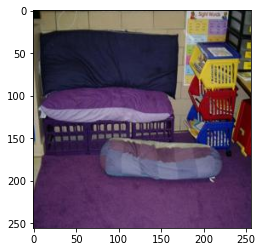

In [15]:
exemplo_test_path = test[compare_example]

exemplo_test_load = load_img(test_path + exemplo_test_path)
exemplo_test = img_to_array(exemplo_test_load)

exemplo_test = exemplo_test / 255

plt.imshow(exemplo_test)

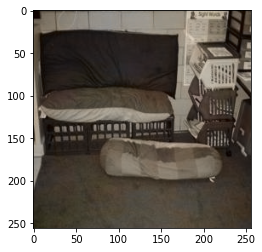

In [16]:
result=np.zeros((256, 256, 3))
result[:,:,0] = color_me[compare_example][:,:,0]
result[:,:,1:] = output[compare_example]
exemplo_predicted = lab2rgb(result)

plt.imshow(exemplo_predicted)